`nacimientos.csv`: contiene la siguiente información registrada en un efector de
salud sobre un total de **345 madres que dieron a luz en el último año**: 
- peso del recién nacido (kg), 
- semanas de gestación, 
- número de partos previos atravesados y 
- edad de la madre al momento del nacimiento. 

`datos_madres.xlsx` :
Luego del parto se registró de las madres, 
- peso (kg) 
- altura (m) 
- número de cigarrillos consumidos a diario,


## Análisis de Datos de Nacimientos


**PARTE I**

**Ejercicio 1: Importación y Limpieza de Datos**

*   (Aquí irían las instrucciones específicas para importar los datasets en el entorno de trabajo utilizado (e.g., R, Python con Pandas). Se detallarían los pasos para leer los archivos.)
*   (Se describirían las tareas de limpieza realizadas: manejo de valores faltantes, corrección de errores, transformación de tipos de datos, etc.)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
nacimientos = pd.read_csv("datasets/nacimientos.csv", sep=';', header=3)
nacimientos.head(5)

,id_madre,peso_kg_bebe,semanas_gest,edad_anios,hijos_previos
0,1,3057.4,38.8,21,1
1,2,2716.6,38.1,26,0
2,3,3230.8,39.1,18,1
3,4,3473.3,41.8,28,2
4,5,2951.5,38.0,29,3


In [2]:
# cargamos el dataset de las madres:
madres = pd.read_excel("datasets/datos_madres.xlsx")#, sep=';', header=3)
madres.head(5)

,ID,ALTURA_M_MUJER,PESO_KG_MUJER,NUM_CIGARRILLOS_DIA
0,1,"1,6",45.4,0
1,2,"1,6",61.2,9
2,3,"1,6",52.2,2
3,4,"1,8",86.2,0
4,5,"1,7",56.7,4


In [3]:
# lo primero que notamos es que a variable 'ALTURA_M_MUJER' tengo que transformarla a tipo de dato numérico
# para eso reemplazamos las comas por puntos y luego transformamos a tipo float
madres['ALTURA_M_MUJER'] = madres['ALTURA_M_MUJER'].str.replace(',','.').astype(float)
madres.head()

,ID,ALTURA_M_MUJER,PESO_KG_MUJER,NUM_CIGARRILLOS_DIA
0,1,1.6,45.4,0
1,2,1.6,61.2,9
2,3,1.6,52.2,2
3,4,1.8,86.2,0
4,5,1.7,56.7,4




**Ejercicio 2: Distribución del IMC en Mujeres**

*   Se calcula el IMC (Índice de Masa Corporal) como:  `IMC = peso (kg) / (estatura (m))^2`
*   Se genera un histograma o gráfico de densidad del IMC para las mujeres en el dataset.
*   **Comentario sobre la simetría:** (Basado en el gráfico, se comenta si la distribución es simétrica, asimétrica positiva (sesgada a la derecha), o asimétrica negativa (sesgada a la izquierda).)

In [4]:
madres['IMC'] = madres['PESO_KG_MUJER'] / madres['ALTURA_M_MUJER']**2
madres.head()

,ID,ALTURA_M_MUJER,PESO_KG_MUJER,NUM_CIGARRILLOS_DIA,IMC
0,1,1.6,45.4,0,17.734375
1,2,1.6,61.2,9,23.906250
2,3,1.6,52.2,2,20.390625
3,4,1.8,86.2,0,26.604938
4,5,1.7,56.7,4,19.619377


Text(0, 0.5, 'Frecuencia')

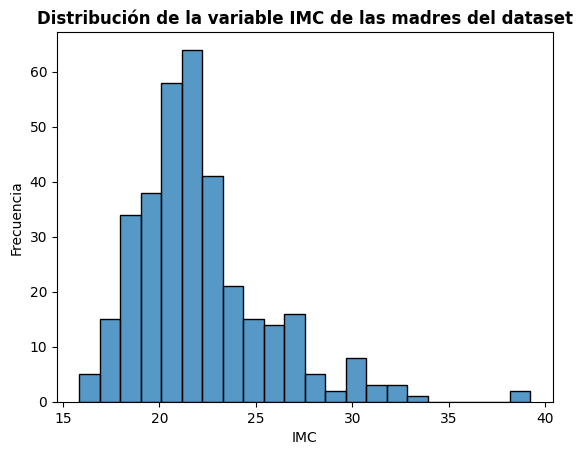

In [5]:
sns.histplot(data=madres, x='IMC')
plt.title("Distribución de la variable IMC de las madres del dataset", weight='bold')
plt.ylabel("Frecuencia")

Podemos notar que el gráfico está sesgado hacia a derecha.


**Ejercicio 3: Variable Fumadora (Binaria)**

*   Se crea una nueva variable categórica "fumadora":
    *   `Fumadora = 1` si la mujer consume 1 o más cigarrillos al día.
    *   `Fumadora = 0` si la mujer no consume cigarrillos.
*   Se calcula el porcentaje de mujeres fumadoras en el dataset.



In [6]:
madres["fumadora"] = madres['NUM_CIGARRILLOS_DIA'].apply(lambda x: 1 if x >= 1 else 0).copy()
madres.head()

,ID,ALTURA_M_MUJER,PESO_KG_MUJER,NUM_CIGARRILLOS_DIA,IMC,fumadora
0,1,1.6,45.4,0,17.734375,0
1,2,1.6,61.2,9,23.906250,1
2,3,1.6,52.2,2,20.390625,1
3,4,1.8,86.2,0,26.604938,0
4,5,1.7,56.7,4,19.619377,1


In [7]:
madres['fumadora'].value_counts(normalize=True)

fumadora
1    0.55942
0    0.44058
Name: proportion, dtype: float64

Text(0, 0.5, 'Porcentajes')

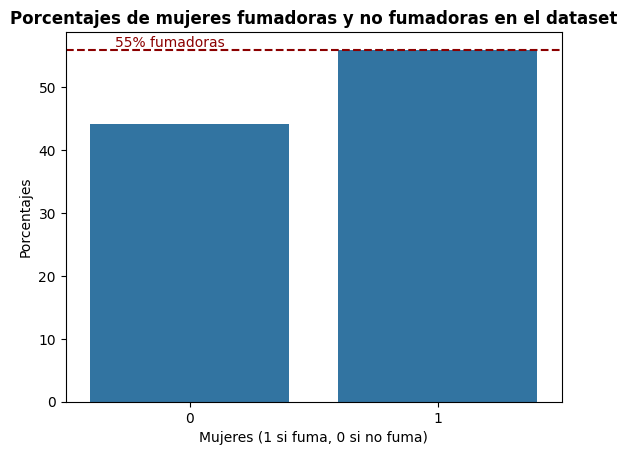

In [8]:


sns.countplot(data=madres, x='fumadora', stat='percent')
plt.axhline(55.942, linestyle='--', color='darkred')
plt.text(-0.3,56.4, "55% fumadoras", color='darkred')
plt.title("Porcentajes de mujeres fumadoras y no fumadoras en el dataset", weight='bold')
plt.xlabel("Mujeres (1 si fuma, 0 si no fuma)")
plt.ylabel("Porcentajes")


**Ejercicio 4: Distribución del Peso al Nacer por Condición de Fumadora**

*   Se genera un gráfico (ej., boxplot, violin plot) que muestra la distribución del peso al nacer para madres fumadoras y no fumadoras.
*   **Comentario:** (Se describe si existe una diferencia notable en el peso al nacer entre los dos grupos, y en qué dirección.)

<Axes: xlabel='PESO_KG_MUJER', ylabel='fumadora'>

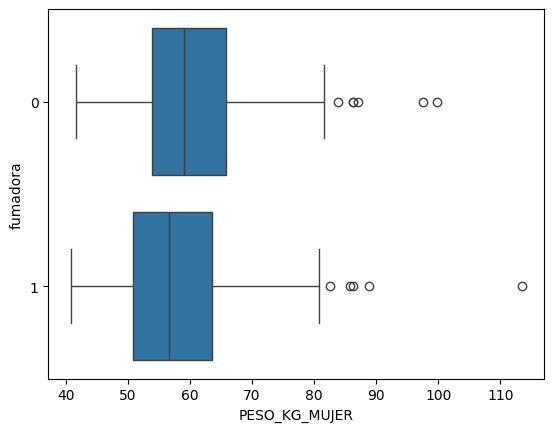

In [9]:
sns.boxplot(data=madres, y='fumadora', x='PESO_KG_MUJER', orient='h')

Podemos notar que el peso de las mujeres que no fuman es mayor que el de las que sí fuman

<Axes: xlabel='PESO_KG_MUJER', ylabel='Density'>

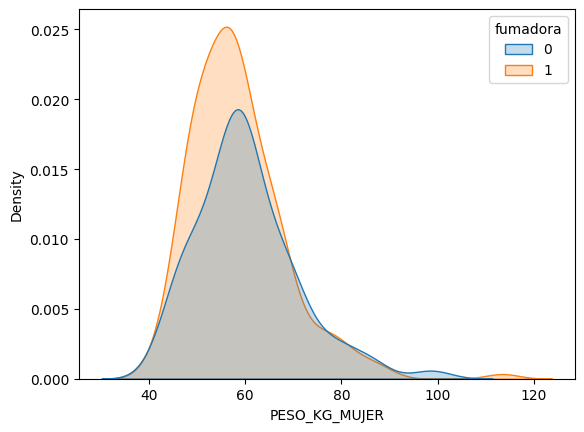

In [10]:
sns.kdeplot(data=madres, x='PESO_KG_MUJER', hue='fumadora', fill=True)


**Ejercicio 5: Correlación entre Variables Cuantitativas**

*   Se calcula la matriz de correlación entre las variables cuantitativas del dataset.
*   Se genera un heatmap o scatterplot matrix para visualizar las correlaciones.
*   **Pares de variables con mayor asociación lineal:** (Se identifican y justifican los pares de variables que muestran las correlaciones más fuertes (positivas o negativas). La justificación se basa en el valor del coeficiente de correlación.)


In [11]:
# Unimos los dataframe así vemos la correlación de todas las variabes posibles

df_merged = pd.merge(
    left=nacimientos,
    right=madres,
    left_on='id_madre', # Columna clave en el df izquierdo
    right_on='ID', # Columna clave en el df derecho
    how='inner' # Tipo de join: 'inner', 'outer', 'left', 'right'
)

In [12]:
df_unido_limpio = df_merged.drop('ID', axis=1)  # No modifica el original
df_unido_limpio.head()

,id_madre,peso_kg_bebe,semanas_gest,edad_anios,hijos_previos,ALTURA_M_MUJER,PESO_KG_MUJER,NUM_CIGARRILLOS_DIA,IMC,fumadora
0,1,3057.4,38.8,21,1,1.6,45.4,0,17.734375,0
1,2,2716.6,38.1,26,0,1.6,61.2,9,23.906250,1
2,3,3230.8,39.1,18,1,1.6,52.2,2,20.390625,1
3,4,3473.3,41.8,28,2,1.8,86.2,0,26.604938,0
4,5,2951.5,38.0,29,3,1.7,56.7,4,19.619377,1


In [13]:
df_unido_limpio.columns

Index(['id_madre', 'peso_kg_bebe', 'semanas_gest', 'edad_anios',
       'hijos_previos', 'ALTURA_M_MUJER', 'PESO_KG_MUJER',
       'NUM_CIGARRILLOS_DIA', 'IMC', 'fumadora'],
      dtype='object')

In [14]:
columnas_correlacionar = ['peso_kg_bebe', 'semanas_gest', 'edad_anios','hijos_previos', 'ALTURA_M_MUJER', 'PESO_KG_MUJER','NUM_CIGARRILLOS_DIA', 'IMC', 'fumadora']

<Axes: >

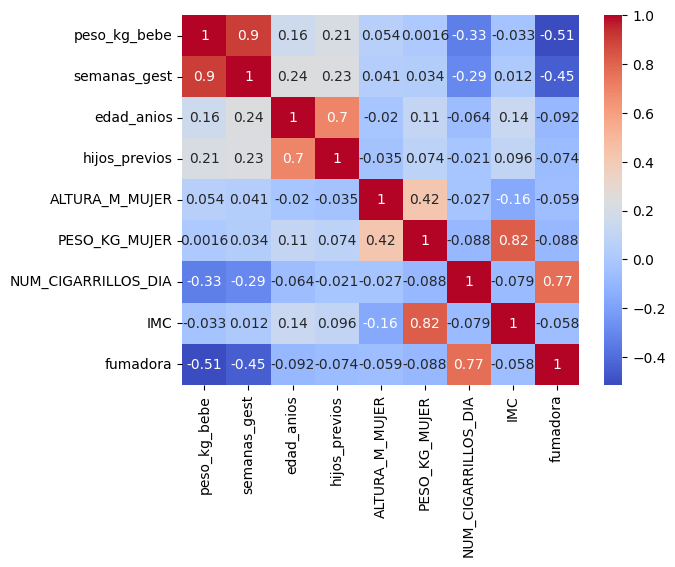

In [15]:
sns.heatmap(df_unido_limpio[columnas_correlacionar].corr(), annot=True, cmap='coolwarm')


**PARTE II**

**Objetivo:** Predecir el peso al nacer usando regresión lineal múltiple.

**Variables Predictoras:**

*   Semanas de gestación
*   Número de partos previos
*   Edad de la madre
*   IMC de la madre
*   Condición de fumadora (binaria)

**a. Modelo Completo**

*   Se ajusta un modelo de regresión lineal múltiple con todas las variables predictoras.
*   (Se muestra la salida del modelo, incluyendo los coeficientes estimados, errores estándar, valores p, etc.)
*   **Variables significativas al 1%:** (Se identifican las variables cuyo valor p es menor a 0.01.  La justificación es que, con un nivel de significancia del 1%, se rechaza la hipótesis nula de que el coeficiente de la variable es igual a cero.)


In [16]:
df_unido_limpio.columns

Index(['id_madre', 'peso_kg_bebe', 'semanas_gest', 'edad_anios',
       'hijos_previos', 'ALTURA_M_MUJER', 'PESO_KG_MUJER',
       'NUM_CIGARRILLOS_DIA', 'IMC', 'fumadora'],
      dtype='object')

In [17]:
import statsmodels.formula.api as smf

modelo1 = smf.ols(formula = 'peso_kg_bebe ~ semanas_gest + hijos_previos + edad_anios + IMC + fumadora', 
                  data=df_unido_limpio).fit()
print(modelo1.summary())


                            OLS Regression Results                            
Dep. Variable:           peso_kg_bebe   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     356.2
Date:                Thu, 03 Jul 2025   Prob (F-statistic):          1.50e-132
Time:                        13:01:45   Log-Likelihood:                -2177.1
No. Observations:                 345   AIC:                             4366.
Df Residuals:                     339   BIC:                             4389.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1531.1921    156.252     -9.799

In [18]:
import scipy
import sys
print(f"Python version: {sys.version}")
print(f"Scipy version: {scipy.__version__}")

# Try to check statsmodels version
try:
    import statsmodels
    print(f"Statsmodels version: {statsmodels.__version__}")
except ImportError as e:
    print(f"Statsmodels import error: {e}")

Python version: 3.12.8 (tags/v3.12.8:2dc476b, Dec  3 2024, 19:30:04) [MSC v.1942 64 bit (AMD64)]
Scipy version: 1.11.4
Statsmodels version: 0.14.4


variable predictora     p-value
semanas_gest            0.000
hijos_previos           0.003
edad_anios              0.000
IMC                     0.042 --> es mayor al 1% por lo tanto no es significativa
fumadora                0.000


**b. Modelo Reducido (Opcional)**

*   (Si se encontraron variables no significativas en el modelo completo, se elimina(n) y se ajusta un nuevo modelo con las variables restantes.)
*   (Se muestra la salida del modelo reducido.)



In [19]:
modelo2 = smf.ols(formula = 'peso_kg_bebe ~ semanas_gest + hijos_previos + edad_anios + fumadora', 
                  data=df_unido_limpio).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:           peso_kg_bebe   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     440.1
Date:                Thu, 03 Jul 2025   Prob (F-statistic):          5.28e-133
Time:                        13:01:45   Log-Likelihood:                -2179.2
No. Observations:                 345   AIC:                             4368.
Df Residuals:                     340   BIC:                             4388.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1630.9673    149.089    -10.940

**c. Ecuación del Modelo e Interpretación**

*   Se escribe la ecuación del modelo ajustado (ya sea el completo o el reducido) en forma explícita:

   `Peso_Nacer = Intercepto + (Coef_Semanas * Semanas_Gestacion) + (Coef_Partos * Partos_Previos) + ...`
*   **Interpretación del coeficiente de semanas de gestación:** (Se explica que por cada semana adicional de gestación, el peso al nacer se espera que aumente en [Valor del Coeficiente] unidades, manteniendo las demás variables constantes.)


Intercept     -1630.9673    
x1: semanas_gest =  125.8830    
x2: hijos_previos =  17.2081    
x3: edad_anios =     -6.9303    
x4: fumadora =      -91.0670

$\hat{y} = -1630.9673 + (125.8830 * x1) + (17.2081 * x2) - (6.9303 * x3) - (91.0670 * x4)$


El coeficiente de semanas de gestación se interpreta que por cada semana de gestación el peso del bebé aumentará 125.8830 gramos.


**d. Estimación del Peso al Nacer**

*   Se introduce los valores dados (semanas de gestación = 38, partos previos = 0, fumadora = 0, edad = 25, IMC = 19.5) en la ecuación del modelo ajustado.
*   Se calcula el peso al nacer estimado.


In [20]:
df_prediccion = pd.DataFrame({'semanas_gest' : [38],
                              'hijos_previos' : [0],
                              'edad_anios' : [25],
                              'fumadora' : [0]
                              })
print(df_prediccion)

modelo2.predict(df_prediccion)

   semanas_gest  hijos_previos  edad_anios  fumadora
0            38              0          25         0


0    2979.32811
dtype: float64


**e. Distribución de los Residuos**

*   Se genera un histograma o Q-Q plot de los residuos del modelo.
*   **Características observadas:** (Se comenta si la distribución de los residuos parece ser aproximadamente normal, si hay patrones que sugieran no linealidad, heterocedasticidad, o la necesidad de transformar alguna variable.)